In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
DATASET_PATH = 'data/Lego/train/'

In [3]:
!ls -l $DATASET_PATH

total 1916
-rw-r--r-- 1 Safiuddin 197609 8196 Jan 12 19:24 _DS_Store
drwxr-xr-x 1 Safiuddin 197609    0 Jan 12 19:25 11214 Bush 3M friction with Cross axle
drwxr-xr-x 1 Safiuddin 197609    0 Jan 12 19:25 18651 Cross Axle 2M with Snap friction
drwxr-xr-x 1 Safiuddin 197609    0 Jan 12 19:24 2357 Brick corner 1x2x2
drwxr-xr-x 1 Safiuddin 197609    0 Jan 12 19:28 3003 Brick 2x2
drwxr-xr-x 1 Safiuddin 197609    0 Jan 12 19:26 3004 Brick 1x2
drwxr-xr-x 1 Safiuddin 197609    0 Jan 12 19:24 3005 Brick 1x1
drwxr-xr-x 1 Safiuddin 197609    0 Jan 12 19:26 3022 Plate 2x2
drwxr-xr-x 1 Safiuddin 197609    0 Jan 12 19:27 3023 Plate 1x2
drwxr-xr-x 1 Safiuddin 197609    0 Jan 12 19:26 3024 Plate 1x1
drwxr-xr-x 1 Safiuddin 197609    0 Jan 12 19:25 3040 Roof Tile 1x2x45deg
drwxr-xr-x 1 Safiuddin 197609    0 Jan 12 19:27 3069 Flat Tile 1x2
drwxr-xr-x 1 Safiuddin 197609    0 Jan 12 19:27 32123 half Bush
drwxr-xr-x 1 Safiuddin 197609    0 Jan 12 19:26 3673 Peg 2M
drwxr-xr-x 1 Safiuddin 197609    0 Jan 12 1

In [4]:
def load_images(path):

    images_train = []
    labels_train = []

    for sub_folder in os.listdir(path):
        fullpath = os.path.join(path, sub_folder)
        print(fullpath)
        if not os.path.isdir(fullpath):
            continue
        images = os.listdir(fullpath)
        for image_filename in images:
            image_fullpath = os.path.join(fullpath, image_filename)
            if os.path.isdir(image_fullpath):
                continue
            img = cv2.imread(image_fullpath)
            images_train.append(img)
            labels_train.append(sub_folder)
    
    return np.array(images_train), np.array(labels_train)

In [5]:
images_train, labels_train = load_images(DATASET_PATH)

data/Lego/train/11214 Bush 3M friction with Cross axle
data/Lego/train/18651 Cross Axle 2M with Snap friction
data/Lego/train/2357 Brick corner 1x2x2
data/Lego/train/3003 Brick 2x2
data/Lego/train/3004 Brick 1x2
data/Lego/train/3005 Brick 1x1
data/Lego/train/3022 Plate 2x2
data/Lego/train/3023 Plate 1x2
data/Lego/train/3024 Plate 1x1
data/Lego/train/3040 Roof Tile 1x2x45deg
data/Lego/train/3069 Flat Tile 1x2
data/Lego/train/32123 half Bush
data/Lego/train/3673 Peg 2M
data/Lego/train/3713 Bush for Cross Axle
data/Lego/train/3794 Plate 1X2 with 1 Knob
data/Lego/train/6632 Technic Lever 3M
data/Lego/train/_DS_Store


In [6]:
images_train.shape, labels_train.shape

((6379, 200, 200, 3), (6379,))

Label: 11214 Bush 3M friction with Cross axle


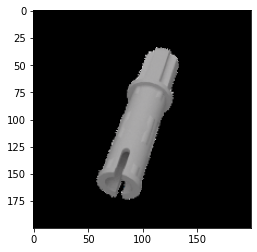

In [7]:
plt.imshow(images_train[0])
print(f'Label: {labels_train[0]}')

In [8]:
X = images_train.reshape(images_train.shape[0], -1)
X.shape

(6379, 120000)

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(labels_train)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5103, 120000), (1276, 120000), (5103,), (1276,))

In [11]:
from sklearn.neural_network import MLPClassifier

In [12]:
clf = MLPClassifier(
    activation='relu',
    hidden_layer_sizes=(100, 100, 100),
    solver='adam',
    verbose=True,
    max_iter=100,
)
clf.fit(X_train, y_train)
print(f'Training set score: {clf.score(X_train, y_train)}')
print(f'Test set score: {clf.score(X_test, y_test)}')

Iteration 1, loss = 26.41957437
Iteration 2, loss = 12.57498381
Iteration 3, loss = 7.50228879
Iteration 4, loss = 4.83209160
Iteration 5, loss = 3.88000550
Iteration 6, loss = 3.32084565
Iteration 7, loss = 2.90154451
Iteration 8, loss = 2.84915795
Iteration 9, loss = 2.54774141
Iteration 10, loss = 2.21986580
Iteration 11, loss = 1.87789685
Iteration 12, loss = 1.83322886
Iteration 13, loss = 1.80081372
Iteration 14, loss = 2.03171441
Iteration 15, loss = 2.01655705
Iteration 16, loss = 1.23238103
Iteration 17, loss = 1.12907119
Iteration 18, loss = 1.08427822
